In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling as pp


color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [27]:
df = pd.read_csv('diabetes.csv')

In [28]:
#pp.ProfileReport(df)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [30]:
fig = px.scatter(df, x='Glucose', y='Insulin')
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Glucose and Insulin')
fig.show()
#There is a positive correlation between the variables glucose and insulin. 
#This makes sense, because a person with higher glucose levels would be expected to take more insulin.

c:\users\el_ghizi_yassine\pycharmprojects\test\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

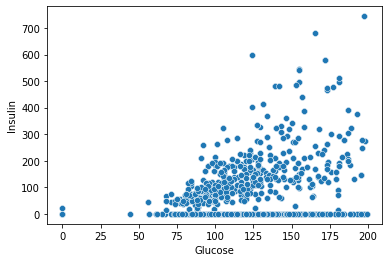

In [50]:
sns.scatterplot(df['Glucose'], df['Insulin'])

In [31]:
#corr matrix 
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist() }
import plotly.graph_objects as go
dfNew = df.corr()
fig = go.Figure(data=go.Heatmap(df_to_plotly(dfNew)))
fig.show()
#Age and Pregnancies
#Glucose and Outcome
#SkinThickness and Insulin

In [32]:
#Pie Chart
dist = df['Outcome'].value_counts()
colors = ['mediumturquoise', 'darkorange']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='Diabetes Outcome')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()
#most patients in the dataset are not diabetic.
#Less than half of them have an outcome of 1 (have diabetes).

In [33]:
fig = px.box(df, x='Outcome', y='Age')
fig.update_traces(marker_color="midnightblue",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Age and Outcome')
fig.show()
#older people are more likely to have diabetes.
#The median age for adults with diabetes is around 35, 
#while it is much lower for people without diabetes.

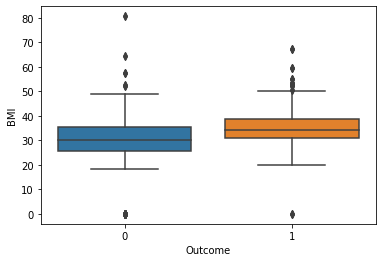

In [48]:
plot = sns.boxplot(x='Outcome',y="BMI",data=df)
#higher BMI correlates with a positive outcome. 
#People with diabetes tend to have higher BMI’s than people without diabetes.

In [35]:
####Normalisation

In [36]:
x = df.drop(["Outcome"],axis = 1) #independent value
y = df.Outcome

In [37]:
#normalisation

In [38]:
#x = (x-np.min(x))/(np.max(x)-np.min(x)).values

In [39]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [40]:
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [41]:
###Random Forest


In [42]:
from sklearn.ensemble import RandomForestClassifier


In [43]:
r_for = RandomForestClassifier().fit(x_train,y_train)
r_for

RandomForestClassifier()

In [44]:
y_pred = r_for.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

In [46]:
rf_score = accuracy_score(y_test,y_pred)
rf_score

0.985